## Download the dataset from this [link](https://docs.google.com/spreadsheets/d/1PCB8PJ7VZKdl55e1UYSaNTKesmiywbDVVsitG5XQjxo/edit?usp=sharing). You can find the dataset description there itself. Read it carefully and answer the questions below

**Make sure you write necessary Python code and use necessary visuals to support your answer**


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Users\lenovo\Downloads\Student Performance Data - Sheet1.csv")

In [3]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group D,some college,standard,completed,59,70,78
1,male,group D,associate's degree,standard,none,96,93,87
2,female,group D,some college,free/reduced,none,57,76,77
3,male,group B,some college,free/reduced,none,70,70,63
4,female,group D,associate's degree,standard,none,83,85,86
...,...,...,...,...,...,...,...,...
995,male,group C,some college,standard,none,77,77,71
996,male,group C,some college,standard,none,80,66,66
997,female,group A,high school,standard,completed,67,86,86
998,male,group E,high school,standard,none,80,72,62


#### Find out the dataset dimensions

In [4]:
df.shape

(1000, 8)

#### Find out statistical summary of the Dataset

In [6]:
df.describe()

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,67.810000,70.382000,69.140000
std,15.250196,14.107413,15.025917
min,15.000000,25.000000,15.000000
25%,58.000000,61.000000,59.000000
50%,68.000000,70.500000,70.000000
75%,79.250000,80.000000,80.000000
max,100.000000,100.000000,100.000000


#### Check for the null values in Dataset

In [7]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

#### Check for the noise value of the dataset

In [8]:
for i in df.columns:
    print(df[i].unique(),'\n')

['female' 'male'] 

['group D' 'group B' 'group C' 'group E' 'group A'] 

['some college' "associate's degree" 'some high school'
 "bachelor's degree" "master's degree" 'high school'] 

['standard' 'free/reduced'] 

['completed' 'none'] 

[ 59  96  57  70  83  68  82  46  80  74  53  76  55  56  35  87  65  66
  67  89  99  58  90  69  32  86  52  63  62  79  71  61  75  73  64  23
  41  84  85  88  91  51 100  48  98  72  43  50  38  81  47  49  44  60
  93  77  20  78  94  39  42  54  37  45  27  92  95  34  97  31  40  33
  21  25  28  15  24  30  36] 

[ 70  93  76  85  57  83  61  75  69  50  74  73  54  46  47  92  82  71
  66  88  52  79  87  81  78  35  53  56  77  72  67  64  86  68  34  91
  62  33  58  49  80  89  97  65  51  96  84  90  95  55  60  99  45  63
  98  40  94  59  48  25  39  43  44  27 100  42  30  32  38  41  37] 

[ 78  87  77  63  86  54  80  58  73  69  49  76  70  52  43  41  81  85
  74  62  71  88  72  51  59  79  75  37  82  48  67  65  90  68  56  84


#### Handle the null values in the Dataset

There is no null value

#### Handle the Noise Values in Dataset

There is no Noise value

#### Check the outliers for various Thresholds (1.5 x IQR , 2 X IQR and so on) for Numeric Columns

In [10]:
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [11]:
col = ["math score","reading score","writing score"]

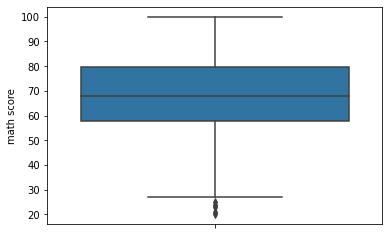

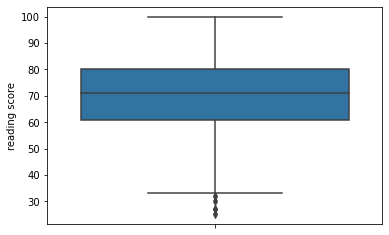

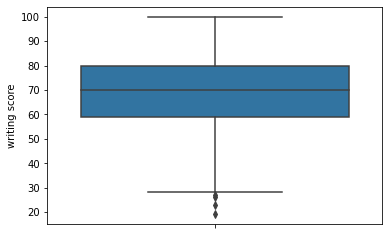

In [12]:
for c in col:
  percentile25 = df[c].quantile(0.25)
  percentile75 = df[c].quantile(0.75)
  IQR = percentile75 - percentile25
  Upperlimit = percentile75 + 1.5*IQR
  Lowerlimit = percentile25 - 2*IQR
  df= df[df[c]<=Upperlimit]
  df = df[df[c]>=Lowerlimit]
  plt.figure()
  sns.boxplot(y=c, data =df)

#### Find out distribution for each column(Use countplot for each feature)

<AxesSubplot:xlabel='math score', ylabel='count'>

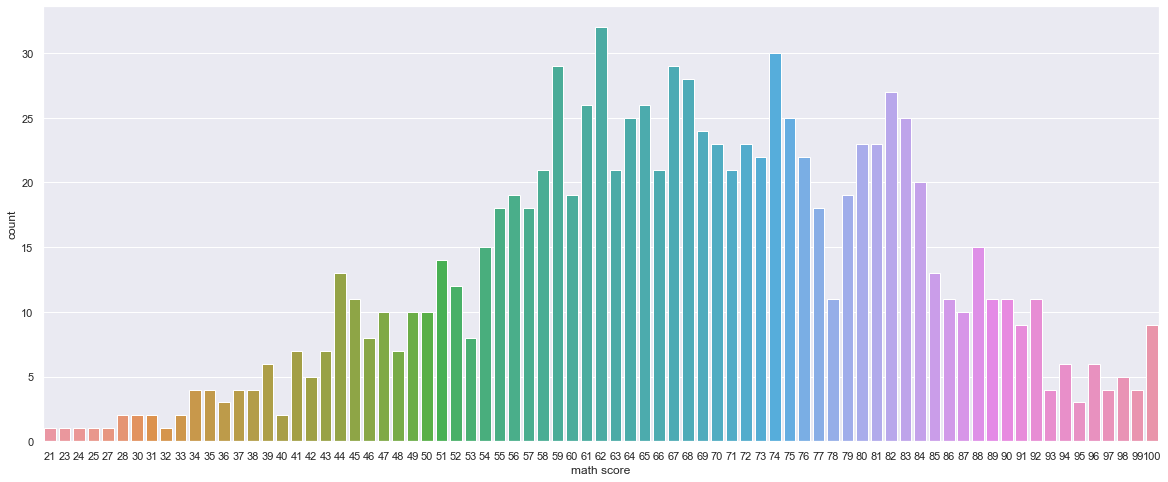

In [32]:
sns.set(rc={'figure.figsize':(20,8)})
sns.countplot(x="math score", data=df)

<AxesSubplot:xlabel='reading score', ylabel='count'>

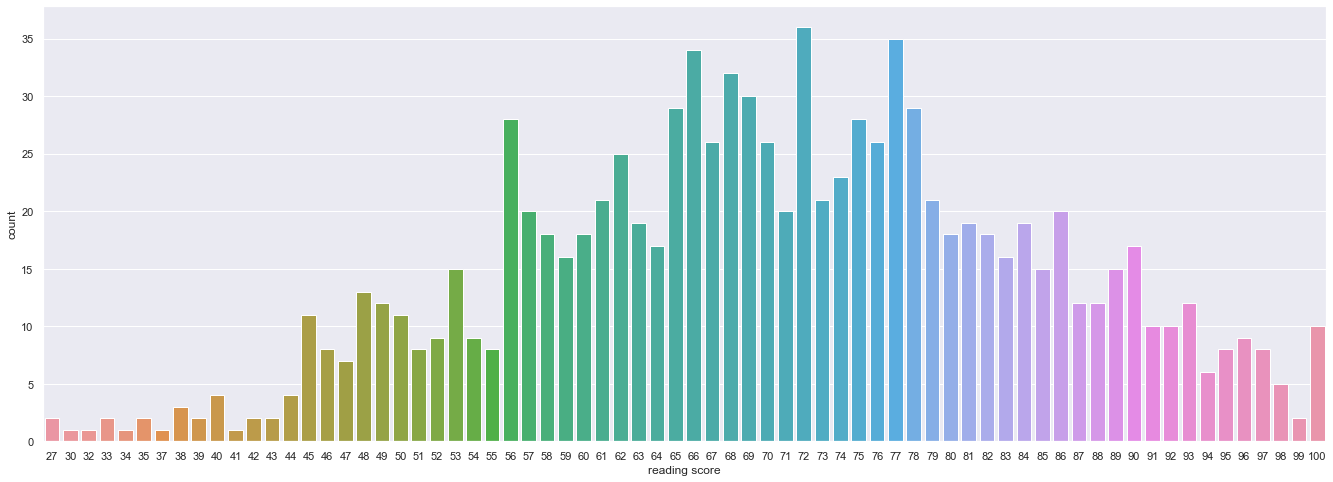

In [33]:
sns.set(rc={'figure.figsize':(23,8)})
sns.countplot(x="reading score", data=df)

<AxesSubplot:xlabel='writing score', ylabel='count'>

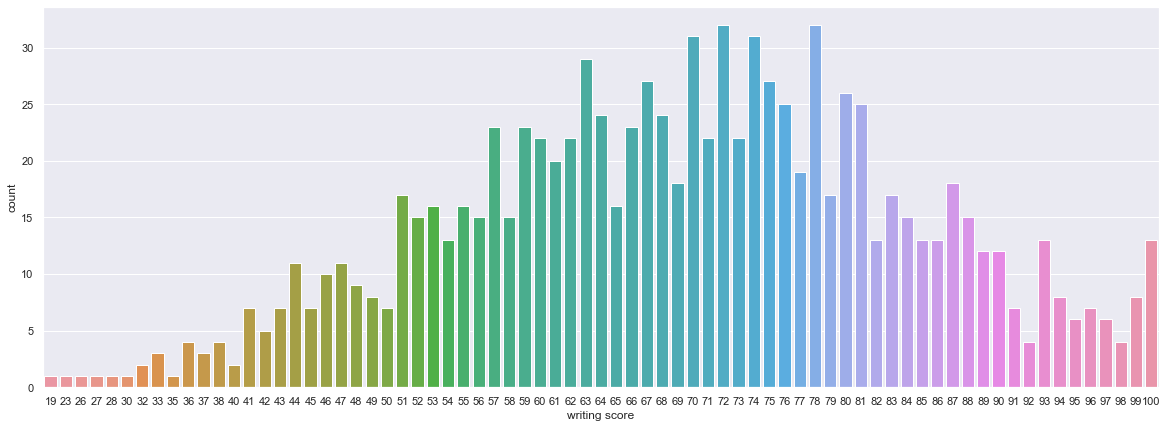

In [34]:
sns.set(rc={'figure.figsize':(20,7)})
sns.countplot(x="writing score", data=df)

#### Plot a pairplot for the dataset and summerize the results of the pairplot. 

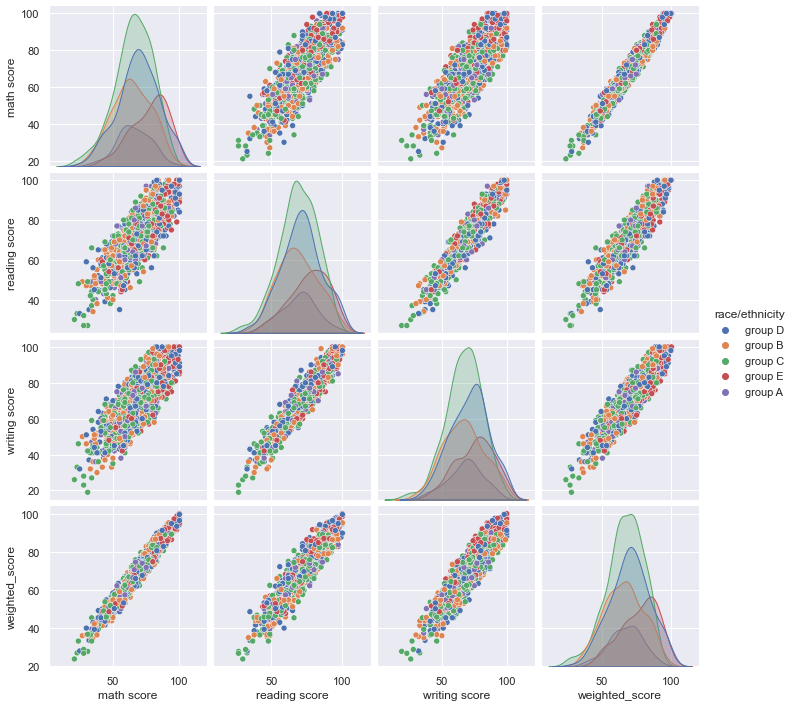

In [40]:
sns.set(rc={'figure.figsize':(20,8.27)})
sns.pairplot(df,hue="race/ethnicity")

1 - The diagonal plots show the univariate distribution of each variable in the dataset by this we can able to find out the outliers 
of the dataset.


2 - The plot apart from the diagonal  plots show the bivariate relationships between variables in the dataset. 
By this we get the correlations or patterns in the data.

#### Give 60% weight to Maths and 20% for the remaining score. Calculate the weighted scores in one column

In [21]:
df["weighted_score"]=(df["math score"]*0.60)+(df["reading score"]*0.2)+(df["writing score"]*0.2)

In [22]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,weighted_score
0,female,group D,some college,standard,completed,59,70,78,65.0
1,male,group D,associate's degree,standard,none,96,93,87,93.6
2,female,group D,some college,free/reduced,none,57,76,77,64.8
3,male,group B,some college,free/reduced,none,70,70,63,68.6
4,female,group D,associate's degree,standard,none,83,85,86,84.0
...,...,...,...,...,...,...,...,...,...
995,male,group C,some college,standard,none,77,77,71,75.8
996,male,group C,some college,standard,none,80,66,66,74.4
997,female,group A,high school,standard,completed,67,86,86,74.6
998,male,group E,high school,standard,none,80,72,62,74.8


#### What is the relation between parental level of education and weighted score. Is there any trend ?

<AxesSubplot:xlabel='parental level of education', ylabel='weighted_score'>

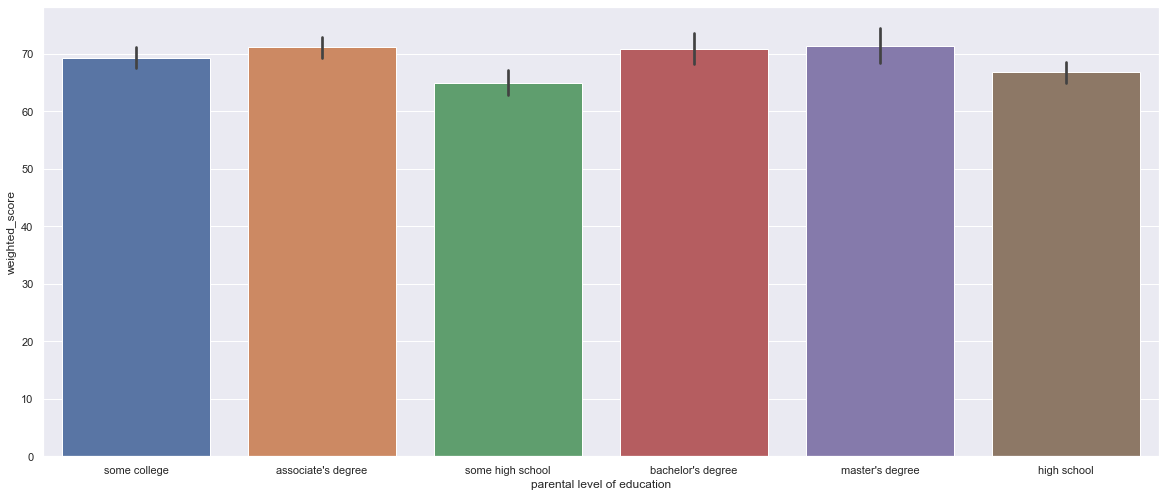

In [35]:
sns.set(rc={'figure.figsize':(20,8.27)})
sns.barplot(x='parental level of education', y='weighted_score', data=df)

From the above trend we conclude that associate degree and master degree have the maximum weighted_score

#### Is there a relationship between race/ethnecity and weighted score ?

<AxesSubplot:xlabel='race/ethnicity', ylabel='weighted_score'>

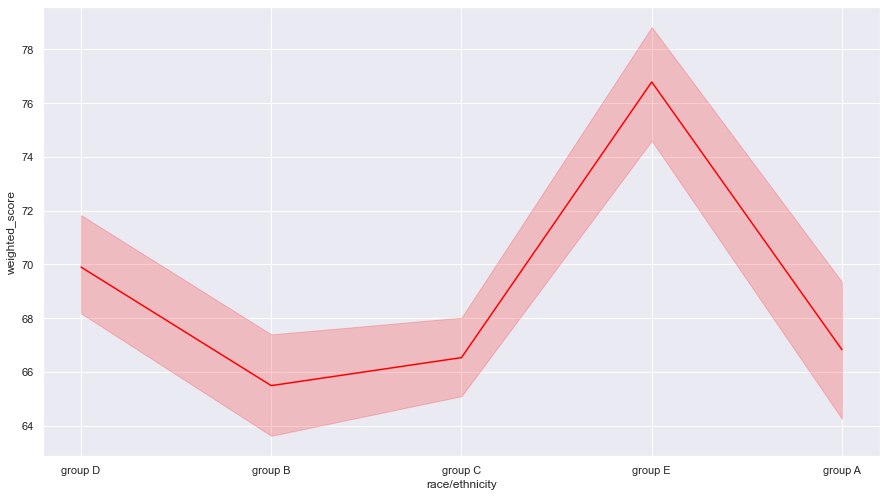

In [39]:
sns.set(rc={'figure.figsize':(15,8.27)})
sns.lineplot(x='race/ethnicity', y='weighted_score', data=df,color = "red")

We clearly see from the lineplot that in group B weighted_score is lowest but the group E has the highest weighted average

#### Find out the most common Parental Education for each race/ethnicity

In [47]:
df.groupby(by = "race/ethnicity")["parental level of education"].value_counts().to_frame()

parental level of education
race/ethnicity parental level of education                             
group A        associate's degree                                    21
               high school                                           20
               some college                                          15
               some high school                                      15
               bachelor's degree                                      4
               master's degree                                        4
group B        high school                                           43
               associate's degree                                    41
               some college                                          40
               some high school                                      33
               bachelor's degree                                     27
               master's degree                                       14
group C        some college                                          79
               high school                                           73
               associate's degree                                    59
               some high school                                      51
               bachelor's degree                                     35
               master's degree                                       25
group D        associate's degree                                    59
               some college                                          55
               some high school                                      52
               high school                                           45
               bachelor's degree                                     25
               master's degree                                       20
group E        some college                                          35
               high school                                           32
               some high school                                      26
               associate's degree                                    24
               bachelor's degree                                     14
               master's degree                                       12

#### Find out genderwise average of weighted score. Find out the tendency in Test preparation for each gender.

In [53]:
df.groupby('gender')['weighted_score'].mean().to_frame()

,weighted_score
gender,
female,68.335642
male,69.019329


In [51]:
df.groupby(["gender","test preparation course"])["weighted_score"].count().to_frame()

weighted_score
gender test preparation course                
female completed                           177
       none                                314
male   completed                           167
       none                                340

#### Find out the effect of test preparation on average score

In [55]:
df.groupby('test preparation course')['weighted_score'].mean().to_frame()

,weighted_score
test preparation course,
completed,72.307558
none,66.776453


Students who completed the test preparation could have a higher average weighted 
score than those who did not complete the course.
By this we  suggests that test preparation can have a positive effect on academic achievement

# Explain the insights you gathered from the analysis done above in this Markdown Section

1 Each column of the dataset was examined using countplots to visualize the distribution of the data in that column

2 A pairplot was generated to visualize the pairwise relationships between the columns in the dataset
  (i) - The diagonal plots show the univariate distribution of each variable in the dataset by this we can able to 
      find out the outliers of the dataset.
(ii) - The plot apart from the diagonal plots show the bivariate relationships between variables in the dataset. 
      By this we get the correlations or patterns in the data.

3 The relationship between parental level of education and weighted score was examined by grouping the data by parental 
  education level and calculating the mean weighted score for each group.
  The analysis suggested that students whose parents had higher levels of education tended to have higher weighted scores.


4 Analysis suggested that the most common parental education level varied by race/ethnicity.

5 Male students tended to have higher weighted scores than Female students.

6 Male students get higher marks but they are not serious about the course completion compare to female students.